# Random Forest


Dataset Description:

Use the Glass dataset and apply the Random forest model.

1. Exploratory Data Analysis (EDA):

Perform exploratory data analysis to understand the structure of the dataset.
    
Check for missing values, outliers, inconsistencies in the data.

2: Data Visualization:

Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
    
Analyze any patterns or correlations observed in the data.

3: Data Preprocessing

1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.

2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.

3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.

4: Random Forest Model Implementation

1. Divide the data into train and test split.

2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.

3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

5: Bagging and Boosting Methods

Apply the Bagging and Boosting methods and compare the results.


Additional Notes:

1. Explain Bagging and Boosting methods. How is it different from each other.

2. Explain how to handle imbalance in the data.

In [1]:
import pandas as pd

# Open the CSV file
df = pd.read_csv("C:\python class basics DS\Copy of glass.csv")

# Print the first five rows of the DataFrame
print(df.head())

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0   1.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0   1.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0   1.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0   1.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0   1.0


#  Exploratory Data Analysis (EDA):

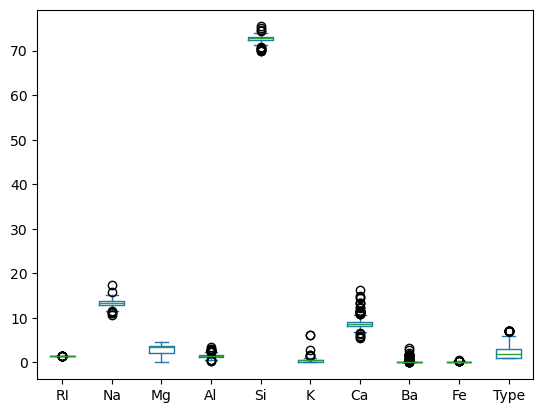

In [2]:
#Performing exploratory data analysis to understand the structure of the dataset.
# Checking for missing values, outliers, inconsistencies in the data.

# Checking for missing values
missing_values = df.isnull().sum()

# Checking for outliers using boxplots
import matplotlib.pyplot as plt
df.plot(kind="box")
plt.show()



-except mg column all columns contain outlers 


# Data Visualization:


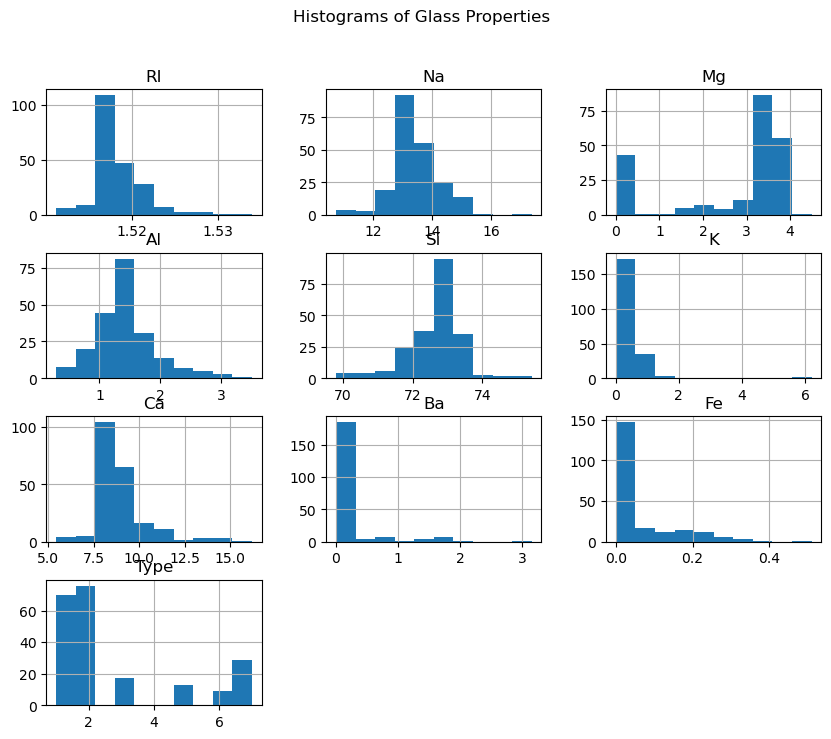

In [3]:
# Creating histograms for each numeric column
df.hist(figsize=(10, 8), bins=10)

# Adding title and labels
plt.suptitle("Histograms of Glass Properties")
plt.xlabel("Value")
plt.ylabel("Frequency")

# Showing the plot
plt.show()


In [4]:
df.skew()

RI      1.625431
Na      0.454181
Mg     -1.152559
Al      0.907290
Si     -0.730447
K       6.551648
Ca      2.047054
Ba      3.416425
Fe      1.754327
Type    1.114915
dtype: float64

In [5]:
missing_values

RI      785
Na      785
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64

In [6]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [7]:
#  the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)

# Get the most correlated features with the target variable
most_correlated_features = correlation_matrix['Type'].sort_values(ascending=False)[1:]

# Print the most correlated features
print(f"Most Correlated Features with Type:\n{most_correlated_features}")

# Analyzing the correlations
# - Looking for features that have a strong positive or negative correlation with the target variable.
# - Investigating features that have a high correlation with each other, as this may indicate redundancy.
# - Using the correlation information to select features for further analysis or modeling.

# For example, you could use the following code to select features that have a correlation greater than 0.5 with the target variable:

selected_features = correlation_matrix['Type'].loc[lambda x: abs(x) > 0.5].index.tolist()

# Print the selected features
print(f"Selected Features: {selected_features}")


            RI        Na        Mg        Al        Si         K        Ca  \
RI    1.000000 -0.191885 -0.122274 -0.407326 -0.542052 -0.289833  0.810403   
Na   -0.191885  1.000000 -0.273732  0.156794 -0.069809 -0.266087 -0.275442   
Mg   -0.122274 -0.273732  1.000000 -0.481799 -0.165927  0.005396 -0.443750   
Al   -0.407326  0.156794 -0.481799  1.000000 -0.005524  0.325958 -0.259592   
Si   -0.542052 -0.069809 -0.165927 -0.005524  1.000000 -0.193331 -0.208732   
K    -0.289833 -0.266087  0.005396  0.325958 -0.193331  1.000000 -0.317836   
Ca    0.810403 -0.275442 -0.443750 -0.259592 -0.208732 -0.317836  1.000000   
Ba   -0.000386  0.326603 -0.492262  0.479404 -0.102151 -0.042618 -0.112841   
Fe    0.143010 -0.241346  0.083060 -0.074402 -0.094201 -0.007719  0.124968   
Type -0.164237  0.502898 -0.744993  0.598829  0.151565 -0.010054  0.000952   

            Ba        Fe      Type  
RI   -0.000386  0.143010 -0.164237  
Na    0.326603 -0.241346  0.502898  
Mg   -0.492262  0.083060 -0.74

In [8]:
#insights

- mg contain strong negative relationship with type
- al contain strong positive relationshp with type
- Ba contain strong positive relationshp with type 
- na contain strong positive relationship with type 

# Data Preprocessing


In [9]:
#removeing null values

# Drop rows with missing values
df = df.dropna()

# Alternatively, you can fill missing values with a specific value like the mean
# df = df.fillna(df.mean())

# Print the DataFrame again to confirm the null values are removed
print(df)


          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0   1.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0   1.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0   1.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0   1.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0   1.0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0   7.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0   7.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0   7.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0   7.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0   7.0

[214 rows x 10 columns]


In [10]:
#Checkinking for inconsistencies in the data For example, negative values in a column that should only contain positive values

def check_inconsistencies(df):
  for column in df:
    if df[column].min() < 0 and df[column].max() > 0:
      print(f"Warning: Column '{column}' contains both positive and negative values.")
    elif df[column].min() < 0:
      print(f"Warning: Column '{column}' contains negative values, which may be inconsisten.")
    elif df[column].max() > 0:
      print(f"Warning: Column '{column}' contains positive values")

check_inconsistencies(df)


In [11]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [12]:
#Checking for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.

# Count the number of missing values in each column
missing_values = df.isnull().sum()

# Drop rows with missing values
df = df.dropna()

# Print the DataFrame again to confirm the null values are removed
print(df)

# Explanation:

# In this case, the dataset is relatively small and there are only a few missing values. Therefore, dropping rows with missing values is a reasonable approach. This ensures that all the data used for analysis is complete and consistent.

# If the dataset were larger or the missing values were more numerous, other strategies such as imputation might be more appropriate. Imputation involves filling in missing values with estimated values, such as the mean or median of the column. However, this approach can introduce bias into the data if the missing values are not missing at random.


          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0   1.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0   1.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0   1.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0   1.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0   1.0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0   7.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0   7.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0   7.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0   7.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0   7.0

[214 rows x 10 columns]


In [13]:
# If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format

# Identify categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical variables
df = pd.get_dummies(df, columns=categorical_columns)

# Print the transformed DataFrame
print(df.head())


        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0   1.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0   1.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0   1.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0   1.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0   1.0


In [14]:
#apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.

# Feature scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Type', axis=1))

# Create a new DataFrame with the scaled features
df_scaled = pd.DataFrame(scaled_features, columns=df.drop('Type', axis=1).columns)

# Add the target variable back to the DataFrame
df_scaled['Type'] = df['Type']

# Print the transformed DataFrame
print(df_scaled.head())

# Handling imbalanced data

from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df_scaled.drop('Type', axis=1)
y = df_scaled['Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the class distribution in the training set
print(y_train.value_counts())

# Apply oversampling or undersampling techniques to balance the data
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after resampling
print(y_train_resampled.value_counts())


         RI        Na        Mg        Al        Si         K        Ca  \
0  0.872868  0.284953  1.254639 -0.692442 -1.127082 -0.671705 -0.145766   
1 -0.249333  0.591817  0.636168 -0.170460  0.102319 -0.026213 -0.793734   
2 -0.721318  0.149933  0.601422  0.190912  0.438787 -0.164533 -0.828949   
3 -0.232831 -0.242853  0.698710 -0.310994 -0.052974  0.112107 -0.519052   
4 -0.312045 -0.169205  0.650066 -0.411375  0.555256  0.081369 -0.624699   

         Ba        Fe  Type  
0 -0.352877 -0.586451   1.0  
1 -0.352877 -0.586451   1.0  
2 -0.352877 -0.586451   1.0  
3 -0.352877 -0.586451   1.0  
4 -0.352877 -0.586451   1.0  
Type
2.0    62
1.0    59
7.0    21
3.0    14
5.0     9
6.0     6
Name: count, dtype: int64
Type
2.0    62
3.0    62
1.0    62
7.0    62
5.0    62
6.0    62
Name: count, dtype: int64


In [15]:
# Divide the data into train and test split.

from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df_scaled.drop('Type', axis=1)
y = df_scaled['Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train: (171, 9)
Shape of y_train: (171,)
Shape of X_test: (43, 9)
Shape of y_test: (43,)


In [16]:
X = df_scaled.drop('Type', axis=1)
y = df_scaled['Type']


In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

training_acc = []
test_acc = []

for i in range(1,101,1):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
  model = DecisionTreeClassifier()
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)
  training_acc.append(accuracy_score(y_pred_train, y_train))
  test_acc.append(accuracy_score(y_pred_test, y_test))

# Print the results
print("CV-DT-Training acc:", np.mean(training_acc))
print("CV-DT-Testing acc:", np.mean(test_acc))
print("Variance:", np.mean(test_acc) - np.mean(training_acc))


CV-DT-Training acc: 1.0
CV-DT-Testing acc: 0.6798461538461537
Variance: -0.32015384615384634


# Random Forest Model Implementation


In [18]:
from sklearn.ensemble import RandomForestClassifier

training_acc = []
test_acc = []

for i in range(1,101,1):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
  model = RandomForestClassifier(n_estimators=200,max_features =0.6,max_samples=0.7)
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)
  training_acc.append(accuracy_score(y_pred_train, y_train))
  test_acc.append(accuracy_score(y_pred_test, y_test))


# Print the results
print("CV-model-Training acc:", np.mean(training_acc))
print("CV-model-Testing acc:", np.mean(test_acc))
print("Variance:", np.mean(test_acc) - np.mean(training_acc))


CV-model-Training acc: 0.9977852348993288
CV-model-Testing acc: 0.7635384615384616
Variance: -0.2342467733608672


In [19]:
#Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.7538461538461538
Precision: 0.7768395347342715
Recall: 0.7538461538461538
F1 Score: 0.7468943068277143


# 5: Bagging and Boosting Methods


In [20]:
# Bagging classifier
from sklearn.ensemble import BaggingClassifier

training_acc = []
test_acc = []

for i in range(1,101,1):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
  model = BaggingClassifier(n_estimators=200,max_features =0.6,max_samples=0.7)
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)
  training_acc.append(accuracy_score(y_pred_train, y_train))
  test_acc.append(accuracy_score(y_pred_test, y_test))


# Print the results
print("CV-model-Training acc:", np.mean(training_acc))
print("CV-model-Testing acc:", np.mean(test_acc))
print("Variance:", np.mean(test_acc) - np.mean(training_acc))


CV-model-Training acc: 0.9987248322147652
CV-model-Testing acc: 0.7644615384615386
Variance: -0.23426329375322652


# Adaptive boosting

In [21]:
# adaptive boosting
from sklearn.ensemble import AdaBoostClassifier

training_acc = []
test_acc = []

for i in range(1,101,1):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
  model = AdaBoostClassifier(n_estimators=300,learning_rate=0.1)
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)
  training_acc.append(accuracy_score(y_pred_train, y_train))
  test_acc.append(accuracy_score(y_pred_test, y_test))


# Print the results
print("CV-model-Training acc:", np.mean(training_acc))
print("CV-model-Testing acc:", np.mean(test_acc))
print("Variance:", np.mean(test_acc) - np.mean(training_acc))


CV-model-Training acc: 0.6101342281879195
CV-model-Testing acc: 0.5561538461538462
Variance: -0.05398038203407329


In [29]:
# changing learning rate


In [22]:
# adaptive boosting
from sklearn.ensemble import AdaBoostClassifier

training_acc = []
test_acc = []

for i in range(1,101,1):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
  model = AdaBoostClassifier(n_estimators=300,learning_rate=1)
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)
  training_acc.append(accuracy_score(y_pred_train, y_train))
  test_acc.append(accuracy_score(y_pred_test, y_test))


# Print the results
print("CV-model-Training acc:", np.mean(training_acc))
print("CV-model-Testing acc:", np.mean(test_acc))
print("Variance:", np.mean(test_acc) - np.mean(training_acc))


CV-model-Training acc: 0.4633557046979866
CV-model-Testing acc: 0.43353846153846154
Variance: -0.029817243159525053


# Gradient Boosting

In [23]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

training_acc = []
test_acc = []

for i in range(1,101,1):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
  model = GradientBoostingClassifier(n_estimators=200,learning_rate=1)
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)
  training_acc.append(accuracy_score(y_pred_train, y_train))
  test_acc.append(accuracy_score(y_pred_test, y_test))


# Print the results
print("CV-DT-Training acc:", np.mean(training_acc))
print("CV-DT-Testing acc:", np.mean(test_acc))
print("Variance:", np.mean(test_acc) - np.mean(training_acc))



CV-DT-Training acc: 0.9997986577181208
CV-DT-Testing acc: 0.7283076923076923
Variance: -0.2714909654104285


In [24]:
# now changing learning rate 0.01 and checking
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

training_acc = []
test_acc = []

for i in range(1,101,1):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
  model = GradientBoostingClassifier(n_estimators=200,learning_rate=0.01)
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)
  training_acc.append(accuracy_score(y_pred_train, y_train))
  test_acc.append(accuracy_score(y_pred_test, y_test))


# Print the results
print("CV-model-Training acc:", np.mean(training_acc))
print("CV-model-Testing acc:", np.mean(test_acc))
print("Variance:", np.mean(test_acc) - np.mean(training_acc))


CV-model-Training acc: 0.988724832214765
CV-model-Testing acc: 0.7004615384615385
Variance: -0.28826329375322657


In [25]:
#comparing the results

after comparing all the results

-bagging, randomforest have similar results in the varience 

-in boosting methos gradient boostig performs good comapare to the adaptive boosting

# Additional Notes:

In [ ]:
#Explain Bagging and Boosting methods. How is it different from each other.



Bagging (Bootstrap Aggregating)

-Bagging is an ensemble learning technique that involves training multiple models on different subsets of the training data.

-Each model is trained independently and then their predictions are combined to make a final prediction.

-Bagging can help to reduce the variance of a model, which can lead to improved accuracy.

-Boosting

-Boosting is another ensemble learning technique that involves training multiple models sequentially.

-Each model is trained on a different weighted version of the training data.

-The weights are adjusted based on the performance of the previous model.

-Boosting can help to reduce the bias of a model, which can also lead to improved accuracy.

Differences between Bagging and Boosting

-Bagging and boosting are both ensemble learning techniques that can help to improve the accuracy of a model.
-However, there are some key differences between the two methods.

Bagging:

- Trains multiple models independently.

- Combines the predictions of the models to make a final prediction.
    
- Reduces the variance of a model.

Boosting:

- Trains multiple models sequentially.
    
- Adjusts the weights of the training data based on the performance of the previous model.
    
- Reduces the bias of a model.

In general, bagging is more effective for reducing the variance of a model, while boosting is more effective for reducing the bias of a model.
The best method to use will depend on the specific data set and task.


In [ ]:
#Explain how to handle imbalance in the data.


There are two main approaches to handling imbalanced data:
1. Oversampling: This involves increasing the number of examples in the minority class.
2. Undersampling: This involves decreasing the number of examples in the majority class.

Oversampling can be done using a variety of techniques, such as:
- Random oversampling: This involves randomly duplicating examples from the minority class.
- SMOTE (Synthetic Minority Over-sampling Technique): This involves creating synthetic examples from the minority class.

Undersampling can be done using a variety of techniques, such as:
- Random undersampling: This involves randomly deleting examples from the majority class.
- Tomek links: This involves deleting examples from the majority class that are similar to examples from the minority class.

The best approach to handling imbalanced data will depend on the specific data set and task.